# Esercizio 12.2

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

2024-06-07 19:43:02.486845: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-07 19:43:02.492389: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 19:43:02.550157: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 19:43:02.550188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 19:43:02.551187: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


In [3]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels) # accende la posizione

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


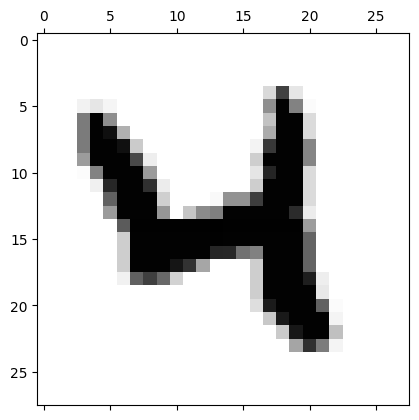

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [4]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [5]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

def create_CNN1(input_shape=(28, 28, 1), num_classes=10):
    
    model = Sequential()
    
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', padding='same', input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2, 2))) 
    
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dropout(0.25))
    
    model.add(Dense(200, activation='relu'))

    model.add(Dense(100, activation='relu'))
    
    model.add(Dropout(0.25))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

def create_CNN2(input_shape=(28, 28, 1), num_classes=10):
    
    model = Sequential()
    
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', padding='same', input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2, 2))) 
    
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dropout(0.0))
    
    model.add(Dense(200, activation='relu'))

    model.add(Dense(100, activation='relu'))
    
    model.add(Dropout(0.0))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

def create_CNN3(input_shape=(28, 28, 1), num_classes=10):
    
    model = Sequential()
    
    model.add(Conv2D(30, kernel_size=(5, 5), activation='relu', padding='same', input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2, 2))) 
    
    model.add(Conv2D(36, kernel_size=(5, 5), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dropout(0.25))
    
    model.add(Dense(200, activation='relu'))

    model.add(Dense(100, activation='relu'))
    
    model.add(Dropout(0.25))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model


def create_CNN4(input_shape=(28, 28, 1), num_classes=10):
    
    model = Sequential()
    
    model.add(Conv2D(2, kernel_size=(5, 5), activation='relu', padding='same', input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2, 2))) 
    
    model.add(Conv2D(5, kernel_size=(5, 5), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dropout(0.25))
    
    model.add(Dense(200, activation='relu'))

    model.add(Dense(100, activation='relu'))
    
    model.add(Dropout(0.25))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model


model_CNN = create_CNN1()

model_CNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        4016      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dropout (Dropout)           (None, 400)               0

In [7]:
# training parameters
batch_size = 32
epochs = 40 # INSERT HERE AN ADEQUATE NUMBER OF EPOCHS!

# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7717 - accuracy: 0.7420 - val_loss: 0.1519 - val_accuracy: 0.9537
Epoch 2/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2161 - accuracy: 0.9339 - val_loss: 0.1076 - val_accuracy: 0.9662
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1563 - accuracy: 0.9524 - val_loss: 0.0753 - val_accuracy: 0.9763
Epoch 4/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1316 - accuracy: 0.9603 - val_loss: 0.0658 - val_accuracy: 0.9790
Epoch 5/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1127 - accuracy: 0.9653 - val_loss: 0.0581 - val_accuracy: 0.9819
Epoch 6/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1020 - accuracy: 0.9689 - val_loss: 0.0498 - val_accuracy: 0.9836
Epoch 7/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0931 - accuracy: 0.9712 - val_loss: 0.0455 - val_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0227 - accuracy: 0.9917

Test loss: 0.022702369838953018
Test accuracy: 0.9916999936103821


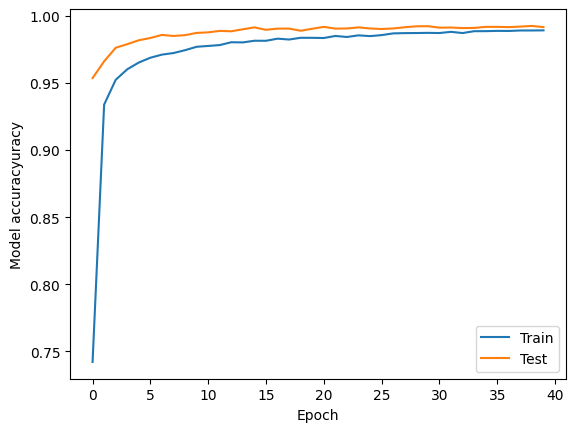

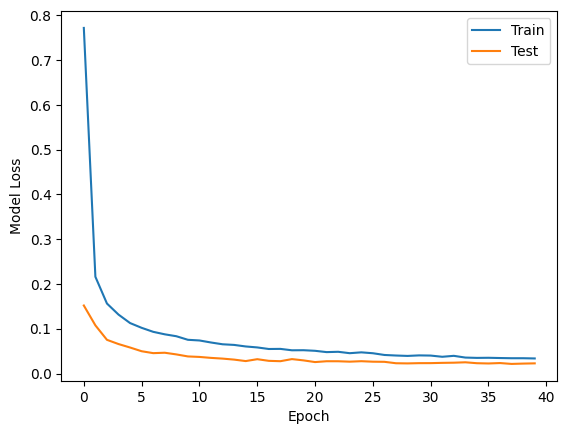

In [8]:
# Evaluate the model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# Print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Model accuracyuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Model Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Write history to a .dat file in columnar format with spaces as delimiter
with open('training_history_mod1.dat', 'w') as f:
    # Write the header
    f.write('Epoch accuracy  Validation_accuracy  Loss  Validation_Loss\n')
    # Write the data
    for i in range(len(history.history['accuracy'])):
        f.write(f"{i+1}  {history.history['accuracy'][i]}  {history.history['val_accuracy'][i]}  {history.history['loss'][i]}  {history.history['val_loss'][i]}\n")


In [9]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#plt.figure(figsize=(15, 15)) 
with open("predizioni_mod1.dat", "w") as f:
    for i in range(10000):
        #ax = plt.subplot(2, 10, i + 1)
        #plt.imshow(X_test[i, :, :, 0], cmap='gray')
        true_digit = np.argmax(Y_test[i])
        predicted_digit = np.argmax(predictions[i])
        #plt.title("Digit: {}\nPredicted:  {}".format(true_digit, predicted_digit))
        #plt.axis('off')

        # Scrive la cifra predetta nel file
        f.write(f"{i + 1}   {true_digit}   {predicted_digit}\n")

313/313 [==============================] - 1s 2ms/step


In [10]:
# Supponendo che 'model' sia il tuo modello addestrato
model_CNN.save('mod1.h5')

/home/matteo/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
